In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision

import pytorch_lightning as pl

import sklearn
import functools
import operator

import sys

import optuna

sys.path.insert(1,"/home/sbulusu/qcd_ml/neural_networks/libs/")

import lat_dataset_load_new_lightning
import custom_torch_net_class_lightning
import utils

from tqdm.notebook import tqdm

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Utilizing CUDA")
else:
    device = torch.device("cpu")
    print("Utilizing CPU")
    

Utilizing CUDA


In [3]:
random_seed = 42
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.enabled = False
torch.backends.cudnn.deterministic = True

In [4]:
"""
Load Data
"""
#conf_file_dir = "/media/data/sbulusu/datasets/kl_config/"
conf_file_dir = "/media/data/sbulusu/datasets/complexworm/Results for CNN/"
#file_format = "*.dat"
#file_format_list = ["*1.170*.dat", "*0.910*.dat"]
file_format_list = ["configs*.dat"]
#file_format_list = ["configs*0.dat"]
lat_size = [10,200]
dim = len(lat_size)
conf_size = np.concatenate(([2],[dim],lat_size))
print(conf_size)
output_size = np.concatenate(([np.prod(conf_size[0:2])],conf_size[2:]))
print(output_size)

label_names = ["n", "phi2"]
labels_in_file_name = ["mu", "phase"]

dataset = lat_dataset_load_new_lightning.kl_dataset(conf_file_dir, file_format_list, conf_size, output_size, label_names, labels_in_file_name, transform=None, device=device)

[  2   2  10 200]
[  4  10 200]
[ -1   2   2  10 200]


Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.945.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)


first example loaded:
{'conf': tensor([[[[ 0,  0,  0,  ...,  0,  0,  0],
          [ 1,  0,  0,  ...,  0,  1,  1],
          [ 0,  0,  1,  ...,  0,  0,  0],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]],

         [[ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  1,  0,  ...,  0, -1,  0],
          [ 0,  1, -1,  ...,  0, -1,  0],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]],


        [[[ 0,  0,  1,  ...,  0,  0,  1],
          [ 0,  0,  0,  ...,  0,  1,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0,  0,  0,  ...,  1,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  1]],

         [[ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0,  1, 


Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.970.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.975.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.950.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.915.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.995.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.010.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.935.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.930.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.015.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.045.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.035.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.965.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.005.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.985.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.955.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.030.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.940.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.960.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.025.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.040.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.980.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.910.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.990.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.920.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.050.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.020.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.000.dat with size :torch.Size([5000, 2, 2, 10, 200])
skipping 0.3 of configurations (warm up)




last example loaded:
{'conf': tensor([[[[ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  1,  1,  1],
          ...,
          [ 0,  1,  1,  ...,  0,  0,  0],
          [ 1,  0,  0,  ...,  1,  1,  1],
          [ 1,  1,  1,  ...,  0,  0,  0]],

         [[-1,  0,  0,  ...,  0,  0,  0],
          [-1,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0, -1,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ..., -1,  0,  0],
          [-1,  0,  0,  ...,  0,  0,  0]]],


        [[[ 0,  0,  0,  ...,  0,  0,  1],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]],

         [[ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0,  0,

In [5]:
#target_attributes = ["mu"]
#output_attributes = ["mu"]
#target_attributes = ["n"]
#output_attributes = ["n"]
#target_attributes = ["phi2"]
#output_attributes = ["phi2"]
#target_attributes = ["phase"]
#output_attributes = ["order","disorder"]
#output_attributes = ["phase_p"]

target_attributes = ["phi2", "n"]
output_attributes = target_attributes

#dataset.train_label_names = ["phase"]
#dataset.train_label_names = ["n"]
#dataset.train_label_names = ["phi2"]

dataset.train_label_names = target_attributes

In [6]:
print(dataset[1])

(tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 1, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 1,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 1, 0,  ..., 0, 0, 0],
         ...,
         [1, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]]), tensor([0.2606, 0.0000], dtype=torch.float64))


In [7]:
sample_conf, sample_label = dataset.get_conf(0)
print(sample_conf.shape)

torch.Size([4, 10, 200])


tensor([0.2919, 0.1000], dtype=torch.float64)


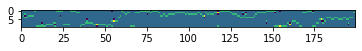

In [8]:
#k_lat_links = sample_conf[0].cpu()
#l_lat_links = sample_conf[1].cpu()
l_lat_links = sample_conf.cpu()
plt.imshow(l_lat_links[0])

print(sample_label)

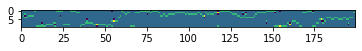

In [9]:
plt.imshow(l_lat_links[0])

In [10]:
"""Take specific example indices with particular labels"""

filter_label_names = ["mu"]
label_values = [[0.910, 1.050]]

filtered_train_indices, remaining_indices = dataset.filter_indices_label_vals(filter_label_names, label_values, remove=False)

Filtering indices with respect to labels ['mu'], remove = False


In [11]:
train_indices = filtered_train_indices
len(train_indices)

7000

In [12]:
len(remaining_indices)

94500

In [13]:
val_test_ratio = [0.2,0.8]
val_indices, test_indices = utils.split_shuffle_indices(remaining_indices, fractions=val_test_ratio, shuffle=True, random_seed=random_seed, log_file=None)

splitting into fraction [0.2, 0.8]
number of indices: 94500
slicing from 0 to 18900
slicing from 18900 to 94500


In [14]:
split_indices= {"train": train_indices, "val":val_indices, "test":test_indices}

In [15]:
"""Manually set network structure"""
"""
    This list can be loaded into the constructor of the Net neural network class, to automatically generate the network structure
    type = pointer to the layer function'
    layer_pars = parameters which must be given to the layer function in order to initialize it
    act_func = activation function to be applied directly after feeding to the corresponding layer
    dropout = certain neurons cna be dropped out if specified
"""

cnn_struct = []
input_size = dataset.output_size
#print(f"input size {input_size}")
#target_size = len(target_attributes)
#print(f"target size {target_size}")
#output_size = target_size
output_size = len(target_attributes)

i0 = input_size[0]
"""
#[ [[in_channels, out_channels], [kernel_size], [stride], padding], ... ]
kernel_pars = [
    [[i0,4],[3,9],[1,1],0],
    [[4,4],[1,4],[1,4],0],
    [[4,8],[3,13],[1,1],0],
    [[8,8],[1,4],[1,4],0], 
    [[8,16],[3,4],[1,1],0],
    [[16,16],[2,2],[2,2],0],
    [[16,16],[2,3],[1,1],0]
]



#fixed_net_struct.append( {"type": layer_type, "layer_pars": {"in_channels": kernel_par[0][0], "out_channels": kernel_par[0][1], "kernel_size": kernel_par[1], "stride": kernel_par[2], "padding": kernel_par[3], "bias": True}} )
for i, kernel_par in enumerate(kernel_pars):
    if i%2 == 0:
        layer_type = nn.Conv2d
        cnn_struct.append( {"type": layer_type, "layer_pars": {"in_channels": kernel_par[0][0], "out_channels": kernel_par[0][1], "kernel_size": kernel_par[1], "stride": kernel_par[2], "padding": kernel_par[3], "bias": True}} )
        #fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
        cnn_struct.append( {"type": nn.ReLU, "layer_pars": {}} )
    else:
        #layer_type = nn.MaxPool2d
        layer_type = nn.AvgPool2d
        cnn_struct.append( {"type": layer_type, "layer_pars": {"kernel_size": kernel_par[1], "stride": kernel_par[2], "padding": kernel_par[3]}} )
"""

#ML paper
# "padding": [1,1]

cnn_struct = []
cnn_struct.append( {"type": nn.Conv2d, "layer_pars": {"in_channels": i0, "out_channels": 16, "kernel_size": [3,3], "stride": [1,1], "padding_mode": "circular", "padding": [2,2], "bias": True}} )
cnn_struct.append( {"type": nn.Conv2d, "layer_pars": {"in_channels": 16, "out_channels": 32, "kernel_size": [3,3], "stride": [1,1], "padding_mode": "circular", "padding": [2,2], "bias": True}} )

cnn_struct.append( {"type": nn.AvgPool2d, "layer_pars": {"kernel_size": [2,2], "stride": [2,2], "padding": 0}} )

cnn_struct.append( {"type": nn.Conv2d, "layer_pars": {"in_channels": 32, "out_channels": 32, "kernel_size": [3,3], "stride": [1,1], "padding_mode": "circular", "padding": [2,2], "bias": True}} )

cnn_struct.append( {"type": nn.AvgPool2d, "layer_pars": {"kernel_size": [1,2], "stride": [1,2], "padding": 0}} )

"""
cnn_struct = []
cnn_struct.append( {"type": nn.Conv2d, "layer_pars": {"in_channels": i0, "out_channels": 16, "kernel_size": [3,3], "stride": [1,1], "padding_mode": "zeros", "padding": [1,1], "bias": True}} )
cnn_struct.append( {"type": nn.Conv2d, "layer_pars": {"in_channels": 16, "out_channels": 32, "kernel_size": [3,3], "stride": [1,1], "padding_mode": "zeros", "padding": [1,1], "bias": True}} )

cnn_struct.append( {"type": nn.AvgPool2d, "layer_pars": {"kernel_size": [2,2], "stride": [2,2], "padding": 0}} )

cnn_struct.append( {"type": nn.Conv2d, "layer_pars": {"in_channels": 32, "out_channels": 32, "kernel_size": [3,3], "stride": [1,1], "padding_mode": "zeros", "padding": [1,1], "bias": True}} )

cnn_struct.append( {"type": nn.AvgPool2d, "layer_pars": {"kernel_size": [1,2], "stride": [1,2], "padding": 0}} )

"""
conv_sizes = utils.calc_layer_sizes(input_size, cnn_struct)
print(conv_sizes)

padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!
[array([  4,  10, 200]), [16, 10, 200], [32, 10, 200], [32, 5, 100], [32, 5, 100], [32, 5, 50]]


In [16]:
fc_input_size = np.product(conv_sizes[-1])
print(fc_input_size)
dense1_struct = []
dense2_struct = []
"""
dense1_struct.append( {"type": nn.Flatten, "layer_pars": {"start_dim": 1}} )
#fixed_net_struct.append( {"type": utils.Reshape, "layer_pars": {"new_shape": [fc_input_size]}} )
dense1_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size, "out_features": fc_input_size//2}} )
dense1_struct.append( {"type": nn.ReLU, "layer_pars": {}} )
#fixed_net_struct.append( {"type": nn.Dropout, "layer_pars": {"p": 0.1 }} )
#fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size//2, "out_features": fc_input_size//4}} )
#fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
#dense1_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size//2, "out_features": 1}} )
dense1_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size//2, "out_features": 2}} )
#fixed_net_struct.append( {"type": nn.Softmax, "layer_pars": {"dim": 1}} )
#dim 0 or 1???
#fixed_net_struct.append( {"type": nn.ConvTranspose2d, "layer_pars": {"in_channels": 1, "out_channels": 1, "kernel_size": [1,1], "stride": 1, "padding": 1, "bias": True}, "act_func": act_func} )

dense2_struct.append( {"type": nn.Flatten, "layer_pars": {"start_dim": 1}} )
#fixed_net_struct.append( {"type": utils.Reshape, "layer_pars": {"new_shape": [fc_input_size]}} )
dense2_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size, "out_features": fc_input_size//2}} )
dense2_struct.append( {"type": nn.ReLU, "layer_pars": {}} )
#fixed_net_struct.append( {"type": nn.Dropout, "layer_pars": {"p": 0.1 }} )
#fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size//2, "out_features": fc_input_size//4}} )
#fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
dense2_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size//2, "out_features": 1}} )
#fixed_net_struct.append( {"type": nn.Softmax, "layer_pars": {"dim": 1}} )
#dim 0 or 1???
#fixed_net_struct.append( {"type": nn.ConvTranspose2d, "layer_pars": {"in_channels": 1, "out_channels": 1, "kernel_size": [1,1], "stride": 1, "padding": 1, "bias": True}, "act_func": act_func} )
"""

#ML paper
dense1_struct.append( {"type": nn.Flatten, "layer_pars": {"start_dim": 1}} )
#fixed_net_struct.append( {"type": utils.Reshape, "layer_pars": {"new_shape": [fc_input_size]}} )
dense1_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size, "out_features": 256}} )
dense1_struct.append( {"type": nn.ReLU, "layer_pars": {}} )
dense1_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": 256, "out_features": 32}} )
dense1_struct.append( {"type": nn.ReLU, "layer_pars": {}} )
dense1_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": 32, "out_features": 2}} )



layer_sizes = utils.calc_layer_sizes(fc_input_size, dense1_struct)
print(layer_sizes)

8000
[8000, 8000, 256, 256, 32, 32, 2]


In [17]:
"""
HYPERPARAMETERS
"""
epochs = 500

"""create list of parameters manually"""

hyper_parameters = {}
hyper_parameters["name"] = "CustomNet"

hyper_parameters["cnn_struct"] = cnn_struct
hyper_parameters["classifier1_struct"] = dense1_struct
hyper_parameters["classifier2_struct"] = dense2_struct
hyper_parameters["input_size"] = dataset.output_size
hyper_parameters["fc_input_size"] = fc_input_size
hyper_parameters["output_size"] = [output_size]
#hyper_parameters["device"] = device

#hyper_parameters["dataset"] = dataset

hyper_parameters["random_seed"] = random_seed
hyper_parameters["epochs"] = epochs

hyper_parameters["bs"] = 32 
hyper_parameters["lr"] = 0.0001

#hyper_parameters["loss_func"] = nn.CrossEntropyLoss
#hyper_parameters["loss_func"] = nn.BCELoss
hyper_parameters["loss"] = nn.MSELoss
hyper_parameters["loss_kwargs"] = {}
hyper_parameters["optimizer"] = optim.Adam
hyper_parameters["optimizer_kwargs"] = {}

In [18]:
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning import Trainer, Callback

# copy class from https://github.com/optuna/optuna/blob/25f578c6d853a396f5c3b8817ace1ff74e6c7300/optuna/integration/pytorch_lightning.py
class PyTorchLightningPruningCallback(EarlyStopping):

    def __init__(self, trial, monitor):
        # type: (optuna.trial.Trial, str) -> None

        super(PyTorchLightningPruningCallback, self).__init__(monitor=monitor)

        self._trial = trial
        self._monitor = monitor

    def on_epoch_end(self, trainer, pl_module):
        # type: (Trainer, LightningModule) -> None
        logs = trainer.callback_metrics
        epoch = pl_module.current_epoch
        current_score = logs.get(self._monitor)
        if current_score is None:
            return
        self._trial.report(current_score, step=epoch)
        if self._trial.should_prune():
            message = "Trial was pruned at epoch {}.".format(epoch)
            raise optuna.exceptions.TrialPruned(message)

#at the end of validation, save the validation loss via this callback class
class MetricsCallback(pl.Callback):
    """PyTorch Lightning metric callback"""

    def __init__(self):
        super().__init__()
        self.metrics = []

    def on_validation_end(self, trainer, pl_module):
        self.metrics.append(trainer.callback_metrics)

In [19]:
lr_min = 10**(-7)
lr_max = 10**(-3)

bs_categories = [8, 16, 32, 64]

#objective to optimize with optuna
def objective(trial):
    #create ranges for adjustable parameters
    lr_range = trial.suggest_loguniform("lr", lr_min, lr_max)
    
    bs_range = trial.suggest_categorical("bs", bs_categories)
    
    #add them to all hyper parameters
    hyper_parameters["lr"] = lr_range
    hyper_parameters["bs"] = bs_range
    
    #create network instance
    model = custom_torch_net_class_lightning.CustomNet(hyper_parameters)
    
    hparams = model.hparams
    
    model.prepare_dataset_splits(dataset, split_indices)

    model.to(device)

    #train_loader = model.train_dataloader()
    #val_loader = model.val_dataloader()
    
    model.configure_loss()
    
    #create checkpoint callback function to save best model based on metric (monitor)
    checkpoint_callback = ModelCheckpoint(
        filepath= os.getcwd() + '/pl_checkpoints/{}-{:03d}'.format(model.hparams['name'], trial.number) + '-{epoch:03d}-{val_loss:.5E}',
        save_top_k=1,
        verbose=False,
        monitor='val_loss',
        mode='min',
        prefix=''
    )
    
    #create callback function to save validation loss
    metrics_callback = MetricsCallback()
    
    #logging with TensorBoard
    tb_logger = TensorBoardLogger("lightning_logs", name=hparams['name'])
    
    #lightning trainer instance
    #with callback functions for checkpoints, validation loss and early stopping
    trainer = pl.Trainer(
        logger=tb_logger,
        gpus=1,
        max_epochs=hyper_parameters["epochs"],
        checkpoint_callback=checkpoint_callback,
        callbacks=[metrics_callback],
        early_stop_callback=PyTorchLightningPruningCallback(trial, monitor="val_loss")
    )
    
    #training procedure
    trainer.fit(model)
    
    # collect all val_losses and return minimum (or average)
    val_losses = []
    for d in metrics_callback.metrics:
        if 'val_loss' in d:
            val_losses.append(d['val_loss'])
            
    target_metric = np.min(val_losses)
    
    return target_metric

In [ ]:
n_trials = 100
study = optuna.create_study()
study.optimize(objective, n_trials=n_trials)

padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


/home/sbulusu/anaconda3/envs/ml/lib/python3.7/site-packages/pytorch_lightning/utilities/warnings.py:18: RuntimeWarning: Displayed epoch numbers in the progress bar start from "1" until v0.6.x, but will start from "0" in v0.8.0.
  warnings.warn(*args, **kwargs)


/home/sbulusu/anaconda3/envs/ml/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/sbulusu/anaconda3/envs/ml/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type AvgPool2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/sbulusu/anaconda3/envs/ml/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Flatten. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/sbulusu/anaconda3/envs/ml/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loadi

[I 2020-04-27 20:03:24,080] Finished trial#0 with value: 4.929696297040209e-05 with parameters: {'lr': 7.384449107018356e-06, 'bs': 64}. Best is trial#0 with value: 4.929696297040209e-05.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-27 20:54:42,030] Finished trial#1 with value: 5.617229544441216e-05 with parameters: {'lr': 1.9802619445703015e-05, 'bs': 64}. Best is trial#0 with value: 4.929696297040209e-05.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-27 22:23:28,411] Finished trial#2 with value: 0.00015049682406242937 with parameters: {'lr': 2.484145696927829e-07, 'bs': 16}. Best is trial#0 with value: 4.929696297040209e-05.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-27 23:16:19,735] Finished trial#3 with value: 4.61369972981629e-06 with parameters: {'lr': 0.0004931999757109684, 'bs': 64}. Best is trial#3 with value: 4.61369972981629e-06.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 00:21:14,036] Finished trial#4 with value: 0.00012104229244869202 with parameters: {'lr': 6.501476940898819e-06, 'bs': 32}. Best is trial#3 with value: 4.61369972981629e-06.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 00:21:30,970] Setting status of trial#5 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 00:22:07,112] Setting status of trial#6 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 00:22:30,270] Setting status of trial#7 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 01:52:42,346] Finished trial#8 with value: 0.0007774527184665203 with parameters: {'lr': 0.0002886823962345874, 'bs': 16}. Best is trial#3 with value: 4.61369972981629e-06.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 01:52:56,778] Setting status of trial#9 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 02:47:17,840] Finished trial#10 with value: 1.773989606590476e-05 with parameters: {'lr': 9.916021905068034e-05, 'bs': 64}. Best is trial#3 with value: 4.61369972981629e-06.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 03:41:52,076] Finished trial#11 with value: 1.4059656678000465e-05 with parameters: {'lr': 0.00010961623349507908, 'bs': 64}. Best is trial#3 with value: 4.61369972981629e-06.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 03:46:10,028] Setting status of trial#12 as TrialState.PRUNED. Trial was pruned at epoch 38.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 03:53:12,407] Setting status of trial#13 as TrialState.PRUNED. Trial was pruned at epoch 25.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 04:47:54,856] Finished trial#14 with value: 2.2313699446385726e-05 with parameters: {'lr': 0.00018506772198010826, 'bs': 64}. Best is trial#3 with value: 4.61369972981629e-06.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 04:52:13,511] Setting status of trial#15 as TrialState.PRUNED. Trial was pruned at epoch 38.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 05:47:03,798] Finished trial#16 with value: 0.00040514691499993205 with parameters: {'lr': 0.000427981734175406, 'bs': 64}. Best is trial#3 with value: 4.61369972981629e-06.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 06:53:28,935] Finished trial#17 with value: 8.452894689980894e-06 with parameters: {'lr': 2.6603059350548174e-05, 'bs': 32}. Best is trial#3 with value: 4.61369972981629e-06.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 06:53:46,794] Setting status of trial#18 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 08:00:26,641] Finished trial#19 with value: 1.264931597688701e-05 with parameters: {'lr': 3.1772644741836065e-05, 'bs': 32}. Best is trial#3 with value: 4.61369972981629e-06.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 08:01:16,236] Setting status of trial#20 as TrialState.PRUNED. Trial was pruned at epoch 5.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 08:07:36,635] Setting status of trial#21 as TrialState.PRUNED. Trial was pruned at epoch 46.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 08:07:54,568] Setting status of trial#22 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 09:14:49,711] Finished trial#23 with value: 7.301830464712111e-06 with parameters: {'lr': 3.869512441702695e-05, 'bs': 32}. Best is trial#3 with value: 4.61369972981629e-06.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 10:21:56,778] Finished trial#24 with value: 0.0046968013048172 with parameters: {'lr': 0.000543894898033849, 'bs': 32}. Best is trial#3 with value: 4.61369972981629e-06.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 10:22:14,010] Setting status of trial#25 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[I 2020-04-28 12:41:19,470] Setting status of trial#31 as TrialState.PRUNED. Trial was pruned at epoch 2.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 12:41:37,602] Setting status of trial#32 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[I 2020-04-28 12:47:29,066] Setting status of trial#39 as TrialState.PRUNED. Trial was pruned at epoch 23.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[I 2020-04-28 13:44:11,909] Finished trial#42 with value: 6.260311693040421e-06 with parameters: {'lr': 7.662314581188618e-05, 'bs': 64}. Best is trial#3 with value: 4.61369972981629e-06.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 13:44:26,932] Setting status of trial#43 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[I 2020-04-28 13:45:13,925] Setting status of trial#46 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 13:45:38,222] Setting status of trial#47 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 13:45:53,976] Setting status of trial#48 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 13:46:29,223] Setting status of trial#49 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 13:46:58,755] Setting status of trial#50 as TrialState.PRUNED. Trial was pruned at epoch 3.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 13:47:14,731] Setting status of trial#51 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 13:48:17,426] Setting status of trial#52 as TrialState.PRUNED. Trial was pruned at epoch 8.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 13:48:33,189] Setting status of trial#53 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 13:48:48,818] Setting status of trial#54 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 13:49:07,448] Setting status of trial#55 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 13:49:23,092] Setting status of trial#56 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[I 2020-04-28 14:57:02,531] Finished trial#57 with value: 0.01886301301419735 with parameters: {'lr': 0.0009852886390936426, 'bs': 32}. Best is trial#3 with value: 4.61369972981629e-06.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 14:57:17,476] Setting status of trial#58 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


[I 2020-04-28 14:57:36,279] Setting status of trial#59 as TrialState.PRUNED. Trial was pruned at epoch 1.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[I 2020-04-28 17:18:53,042] Finished trial#60 with value: 1.0082233529828954e-05 with parameters: {'lr': 6.664887959099126e-05, 'bs': 8}. Best is trial#3 with value: 4.61369972981629e-06.


padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type       | Params
-------------------------------------------
0  | cnn             | Net        | 14 K  
1  | cnn.layers      | ModuleList | 14 K  
2  | cnn.layers.0    | Conv2d     | 592   
3  | cnn.layers.1    | Conv2d     | 4 K   
4  | cnn.layers.2    | AvgPool2d  | 0     
5  | cnn.layers.3    | Conv2d     | 9 K   
6  | cnn.layers.4    | AvgPool2d  | 0     
7  | dense1          | Net        | 2 M   
8  | dense1.layers   | ModuleList | 2 M   
9  | dense1.layers.0 | Flatten    | 0     
10 | dense1.layers.1 | Linear     | 2 M   
11 | dense1.layers.2 | ReLU       | 0     
12 | dense1.layers.3 | Linear     | 8 K   
13 | dense1.layers.4 | ReLU       | 0     
14 | dense1.layers.5 | Linear     | 66    
15 | loss            | MSELoss    | 0     


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
study.best_params

In [ ]:
study.best_trial

In [ ]:
trial_coords = np.zeros((len(study.trials),2))

trial_metrics = np.zeros((len(study.trials)))

for trial_i, trial in enumerate(study.trials):
    par_i = 0
    for par_name in trial.params:
        trial_coords[trial_i, par_i] = trial.params[par_name]
        trial_metrics[trial_i] = trial.value
        par_i +=1
        
plt.scatter(trial_coords[:,0], trial_coords[:,1], c=trial_metrics, cmap="RdBu")

In [20]:
checkpoint_path = "pl_checkpoints/CustomNet-003-epoch=495-val_loss=4.36878E-06.ckpt"

In [21]:
for hpar in study.best_params:
#for hpar in best_params:
    print(hpar)
    hyper_parameters[hpar] = study.best_params[hpar]
    #hyper_parameters[hpar] = best_params[hpar]
print(hyper_parameters)

NameError: name 'study' is not defined

In [22]:
hyper_parameters["cnn_struct"]

[{'type': torch.nn.modules.conv.Conv2d,
  'layer_pars': {'in_channels': 4,
   'out_channels': 16,
   'kernel_size': [3, 3],
   'stride': [1, 1],
   'padding_mode': 'circular',
   'padding': [2, 2],
   'bias': True}},
 {'type': torch.nn.modules.conv.Conv2d,
  'layer_pars': {'in_channels': 16,
   'out_channels': 32,
   'kernel_size': [3, 3],
   'stride': [1, 1],
   'padding_mode': 'circular',
   'padding': [2, 2],
   'bias': True}},
 {'type': torch.nn.modules.pooling.AvgPool2d,
  'layer_pars': {'kernel_size': [2, 2], 'stride': [2, 2], 'padding': 0}},
 {'type': torch.nn.modules.conv.Conv2d,
  'layer_pars': {'in_channels': 32,
   'out_channels': 32,
   'kernel_size': [3, 3],
   'stride': [1, 1],
   'padding_mode': 'circular',
   'padding': [2, 2],
   'bias': True}},
 {'type': torch.nn.modules.pooling.AvgPool2d,
  'layer_pars': {'kernel_size': [1, 2], 'stride': [1, 2], 'padding': 0}}]

In [23]:
#best_model = custom_torch_net_class_lightning.CustomNet.load_from_checkpoint(checkpoint_path,hyper_parameters)
best_model = custom_torch_net_class_lightning.CustomNet.load_from_checkpoint(checkpoint_path)

best_model.prepare_dataset_splits(dataset, split_indices)

best_model.to(device)

best_model.configure_loss()

best_model.eval()

padding size possibly incorrect!
padding size possibly incorrect!
padding size possibly incorrect!


CustomNet(
  (cnn): Net(
    (layers): ModuleList(
      (0): Conv2d(4, 16, kernel_size=[3, 3], stride=[1, 1], padding=[2, 2], padding_mode=circular)
      (1): Conv2d(16, 32, kernel_size=[3, 3], stride=[1, 1], padding=[2, 2], padding_mode=circular)
      (2): AvgPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0)
      (3): Conv2d(32, 32, kernel_size=[3, 3], stride=[1, 1], padding=[2, 2], padding_mode=circular)
      (4): AvgPool2d(kernel_size=[1, 2], stride=[1, 2], padding=0)
    )
  )
  (dense1): Net(
    (layers): ModuleList(
      (0): Flatten()
      (1): Linear(in_features=8000, out_features=256, bias=True)
      (2): ReLU()
      (3): Linear(in_features=256, out_features=32, bias=True)
      (4): ReLU()
      (5): Linear(in_features=32, out_features=2, bias=True)
    )
  )
  (loss): MSELoss()
)

In [33]:
"""
Load Test Data
"""
net = best_model
net.eval()
print(f"test dataset size: {len(test_indices)}")

input_size = net.input_size
output_size = net.output_size
model_input_shape = tuple(np.concatenate(([-1],input_size)))
print(model_input_shape)

#net_outputs = np.zeros( (len(test_indices)) )
net_outputs = np.zeros( (len(test_indices), len(output_attributes)) )
#labels = np.zeros( (len(test_indices)) )
labels = np.zeros( (len(test_indices), len(output_attributes)) )
mus = np.zeros( (len(test_indices)) )

for i in tqdm(range(len(test_indices))):
#for i in tqdm(range(len(val_indices))):
    
    test_index = test_indices[i]
    conf_lat_links, label = dataset.get_conf(test_index)
    mus[i] = dataset.data[test_index]["mu"].detach().cpu().numpy()
    net_outputs[i] = net(conf_lat_links.view(model_input_shape).to(device).float()).detach().cpu().numpy()
    #output = net(conf_lat_links.view(model_input_shape).float())
    #labels[i] = label.detach().cpu().numpy()
    labels[i] = np.array(label)
    

test dataset size: 75600
(-1, 4, 10, 200)


In [34]:
unique_mus = np.unique(mus)
num_mus = len(unique_mus)

In [35]:
##save the observable values in a dictionary
obs_mu_dict = {}
for target_name in target_attributes:
    obs_mu_dict[target_name] = {"label" : [],"pred" : []}

In [36]:

obs_label = []
obs_pred = []
for mu_val in unique_mus:
    mu_loc = np.where(mus == mu_val)[0]
    obs_label_mu = np.array(labels[mu_loc,0])
    obs_pred_mu = np.array(net_outputs[mu_loc,0])
    
    obs_label.append(obs_label_mu)    
    obs_pred.append(obs_pred_mu)

    

In [37]:
##to be able to plot the observables against mu, they have to be sorted with respect to it
for mu_val in unique_mus:
    ##find which examples have a particular mu value (mu_val)
    mu_loc = np.where(mus == mu_val)[0]
    ##find the labels and prediction of observables which correspond to these examples
    obs_label_mu_val = labels[mu_loc]
    obs_pred_mu_val = net_outputs[mu_loc]
    for target_i, target_name in enumerate(target_attributes):
        
        obs_label_mu = np.array(labels[mu_loc,target_i])
        obs_pred_mu = np.array(net_outputs[mu_loc,target_i])
        
        obs_mu_dict[target_name]["label"].append(obs_label_mu)
        obs_mu_dict[target_name]["pred"].append(obs_pred_mu)

        
        
        
for target_i, target_name in enumerate(target_attributes):
    obs_mu_dict[target_name]["label"] = np.array(obs_mu_dict[target_name]["label"])
    obs_mu_dict[target_name]["pred"] = np.array(obs_mu_dict[target_name]["pred"])

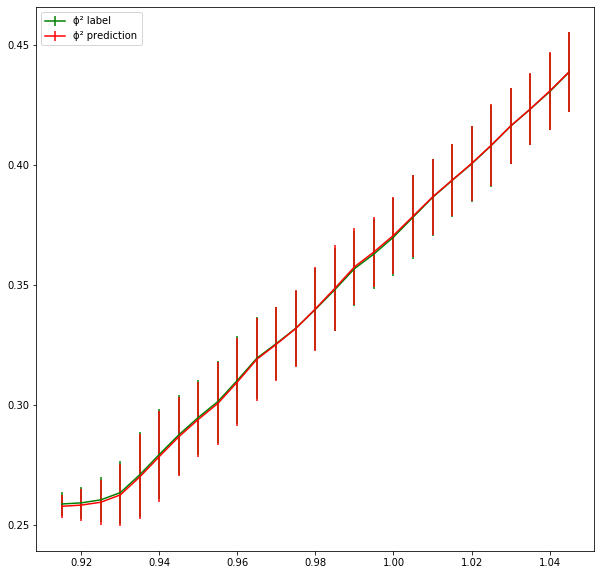

In [38]:
plt.rcParams['figure.figsize'] = [10, 10]

plot_target = "phi2"

obs_label = np.array(obs_mu_dict[plot_target]["label"])
obs_pred = np.array(obs_mu_dict[plot_target]["pred"])

mean_obs_label = np.zeros(len(obs_label))
std_obs_label = np.zeros(len(obs_label))

mean_obs_pred = np.zeros(len(obs_pred))
std_obs_pred = np.zeros(len(obs_pred)) 

for i in range(len(obs_label)):
    mean_obs_label[i] = np.mean(obs_label[i])
    std_obs_label[i] = np.std(obs_label[i])
    
    mean_obs_pred[i] = np.mean(obs_pred[i])
    std_obs_pred[i] = np.std(obs_pred[i])
    
#plt.scatter(unique_mus, mean_obs_label, c="g")
#plt.scatter(unique_mus, mean_obs_pred, c="r")
    
plt.errorbar(unique_mus, mean_obs_label, yerr=std_obs_label, color="g", label="ϕ² label")
plt.errorbar(unique_mus, mean_obs_pred, yerr=std_obs_pred, color="r", label="ϕ² prediction")
plt.legend(loc="upper left")
plt.savefig("phi2_mu")

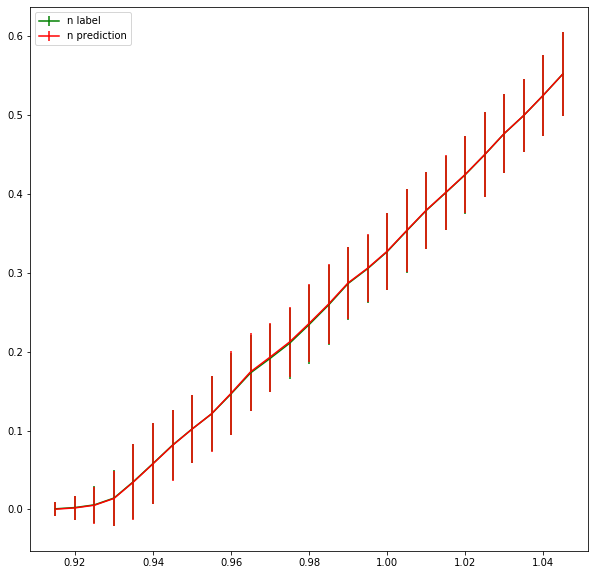

In [39]:
plt.rcParams['figure.figsize'] = [10, 10]

plot_target = "n"

obs_label = np.array(obs_mu_dict[plot_target]["label"])
obs_pred = np.array(obs_mu_dict[plot_target]["pred"])

mean_obs_label = np.zeros(len(obs_label))
std_obs_label = np.zeros(len(obs_label))

mean_obs_pred = np.zeros(len(obs_pred))
std_obs_pred = np.zeros(len(obs_pred)) 

for i in range(len(obs_label)):
    mean_obs_label[i] = np.mean(obs_label[i])
    std_obs_label[i] = np.std(obs_label[i])
    
    mean_obs_pred[i] = np.mean(obs_pred[i])
    std_obs_pred[i] = np.std(obs_pred[i])
    
#plt.scatter(unique_mus, mean_obs_label, c="g")
#plt.scatter(unique_mus, mean_obs_pred, c="r")
    
plt.errorbar(unique_mus, mean_obs_label, yerr=std_obs_label, color="g", label="n label")
plt.errorbar(unique_mus, mean_obs_pred, yerr=std_obs_pred, color="r", label="n prediction")
plt.legend(loc="upper left")
plt.savefig("n_mu")

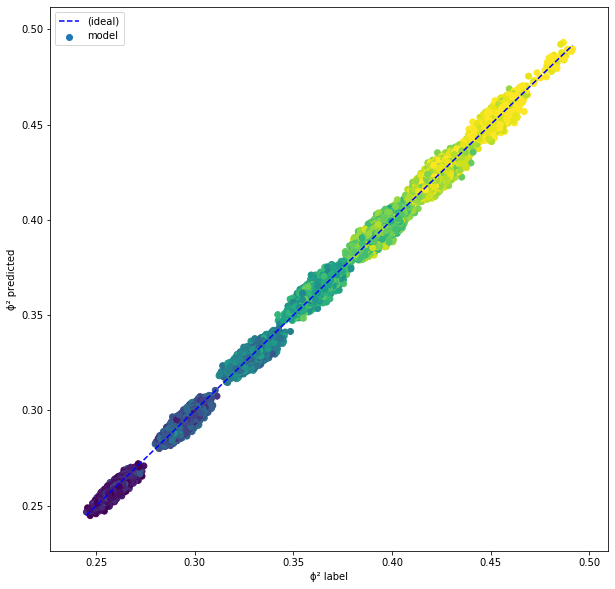

In [40]:
plt.rcParams['figure.figsize'] = [10, 10]

target_i = 0

x_max = np.max(labels[:,target_i])
x_min = np.min(labels[:,target_i])


#plt.scatter(labels[:,target_i], net_outputs[:,target_i], c="r", label="model")
plt.scatter(labels[:,target_i], net_outputs[:,target_i], c=mus, label="model")
plt.plot([x_min, x_max], [x_min, x_max], linestyle="--", color="b", label="(ideal)")
plt.xlabel("ϕ² label")
plt.ylabel("ϕ² predicted")
plt.legend(loc="upper left")
#plt.show()
plt.savefig("phi2_label_pred") 

In [49]:
len(unique_mus)

27

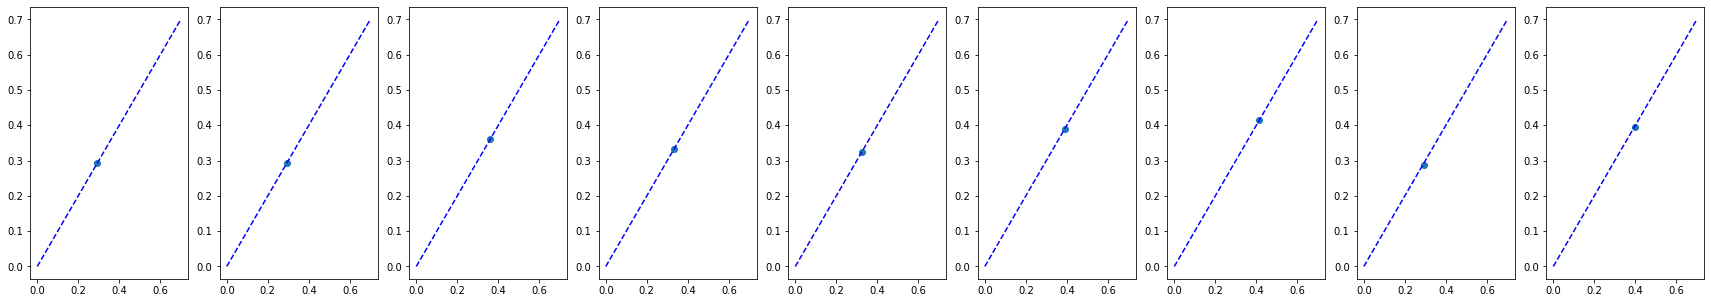

In [53]:
plt.rcParams['figure.figsize'] = [30, 5]

target_i = 0

plot_unique_mus = unique_mus[::3]

fig, ax = plt.subplots(ncols=len(plot_unique_mus))

target_labels = labels[:,target_i]
target_net_outputs = net_outputs[:,target_i]



#for mu_i, mu_val in enumerate(unique_mus[::10]):
for mu_i, mu_val in enumerate(plot_unique_mus):
    
    plot_indices = np.argwhere(unique_mus == mu_val)

    plot_target_labels = target_labels[plot_indices]
    plot_target_net_outputs = target_net_outputs[plot_indices]
    
    ax[mu_i].scatter(plot_target_labels, plot_target_net_outputs)
    ax[mu_i].plot([x_min, x_max], [x_min, x_max], linestyle="--", color="b", label="(ideal)")

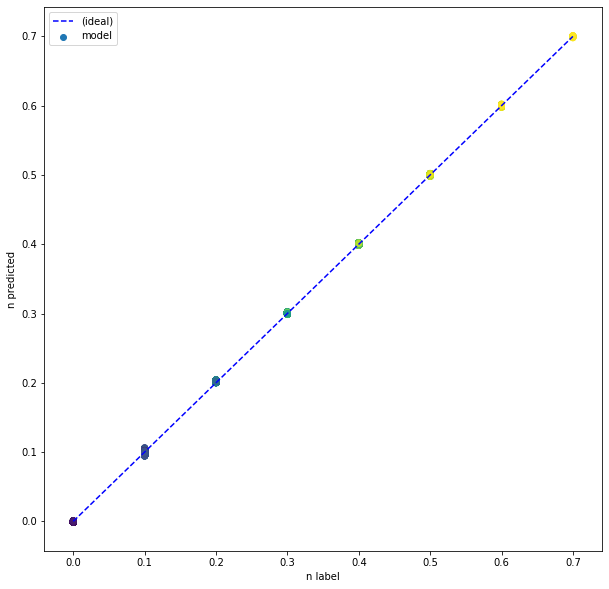

In [42]:
plt.rcParams['figure.figsize'] = [10, 10]

target_i = 1

x_max = np.max(labels[:,target_i])
x_min = np.min(labels[:,target_i])


#plt.scatter(labels[:,target_i], net_outputs[:,target_i], c="r", label="model")
plt.scatter(labels[:,target_i], net_outputs[:,target_i], c=mus, label="model")
plt.plot([x_min, x_max], [x_min, x_max], linestyle="--", color="b", label="(ideal)")
plt.xlabel("n label")
plt.ylabel("n predicted")
plt.legend(loc="upper left")
#plt.show()
plt.savefig("n_label_pred") 